In [8]:
#pip install xarray netcdf4
#pip install --upgrade pandas
#pip install --upgrade xarray

In [30]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

dataset_msl = xr.open_dataset("mslp_coarse.nc", engine="netcdf4")
dataset_sst = xr.open_dataset("sst.mnmean.nc", engine="netcdf4")

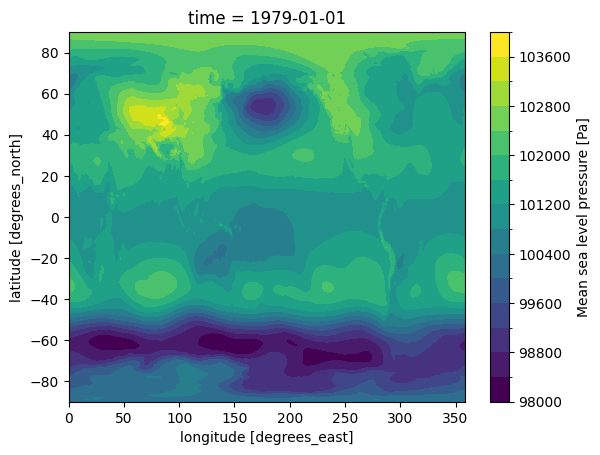

In [11]:
dataset_msl["msl"].isel(time=0).plot.contourf(levels=20, center=False)

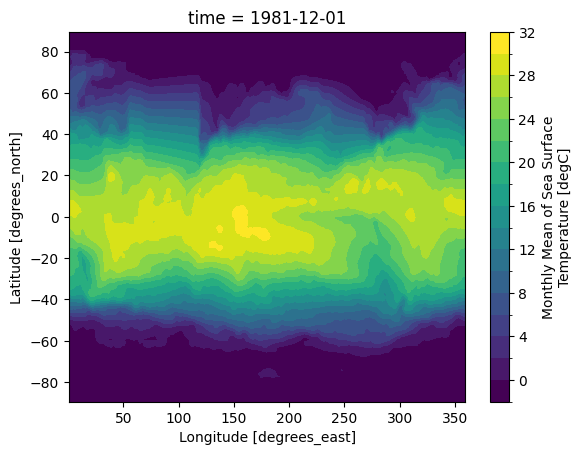

In [16]:
dataset_sst["sst"].isel(time=0).plot.contourf(levels=20, center=False)

In [27]:
dataset_sst

<xarray.Dataset> Size: 123MB
Dimensions:    (time: 475, lat: 180, lon: 360, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2021-06-01
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 123MB ...
    time_bnds  (time, nbnds) datetime64[ns] 8kB ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

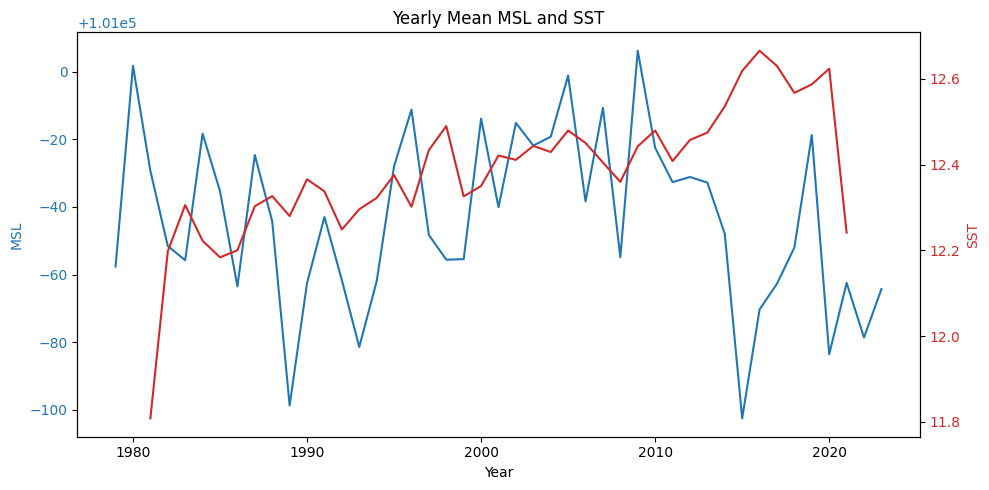

In [ ]:
msl_yearly = (dataset_msl.msl.groupby("time.year").mean(dim=["time", "latitude", "longitude"]))
sst_yearly = (dataset_sst.sst.groupby("time.year").mean(dim=["time", "lat", "lon"]))

fig, ax1 = plt.subplots(figsize=(10, 5))

#MSL
ax1.plot(msl_yearly['year'], msl_yearly, color='tab:blue', label='MSL')
ax1.set_xlabel("Year")
ax1.set_ylabel("MSL", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# SST
ax2 = ax1.twinx()
ax2.plot(sst_yearly['year'], sst_yearly, color='tab:red', label='SST')
ax2.set_ylabel("SST", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Yearly Mean MSL and SST")
fig.tight_layout()
plt.show()